In [1]:
from orbitflows import GsympNetFlow, generate_orbits, plot_aa
import torch
import numpy as np

# galpy
from galpy.actionAngle import actionAngleVertical
from galpy.potential import IsothermalDiskPotential
import json

# Generate Training Data

In [26]:
# set parameters for example training set

amp = 1
sigma = 0.1
frac_dif = 0.1

potential = IsothermalDiskPotential(amp=amp, sigma=sigma)
aAV = actionAngleVertical(pot=potential)

n_steps = 1000
t_end = 100

## Generating Random Phase-Space Values

## Generating Orbits

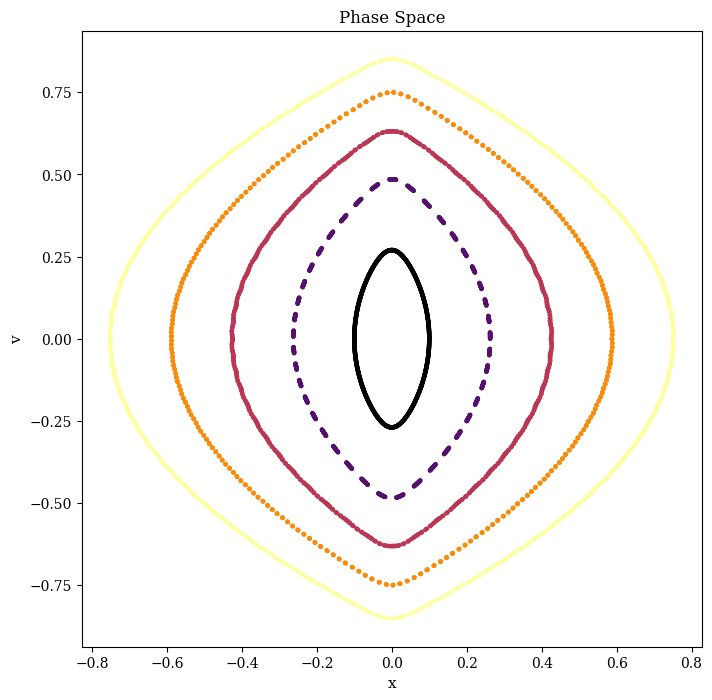

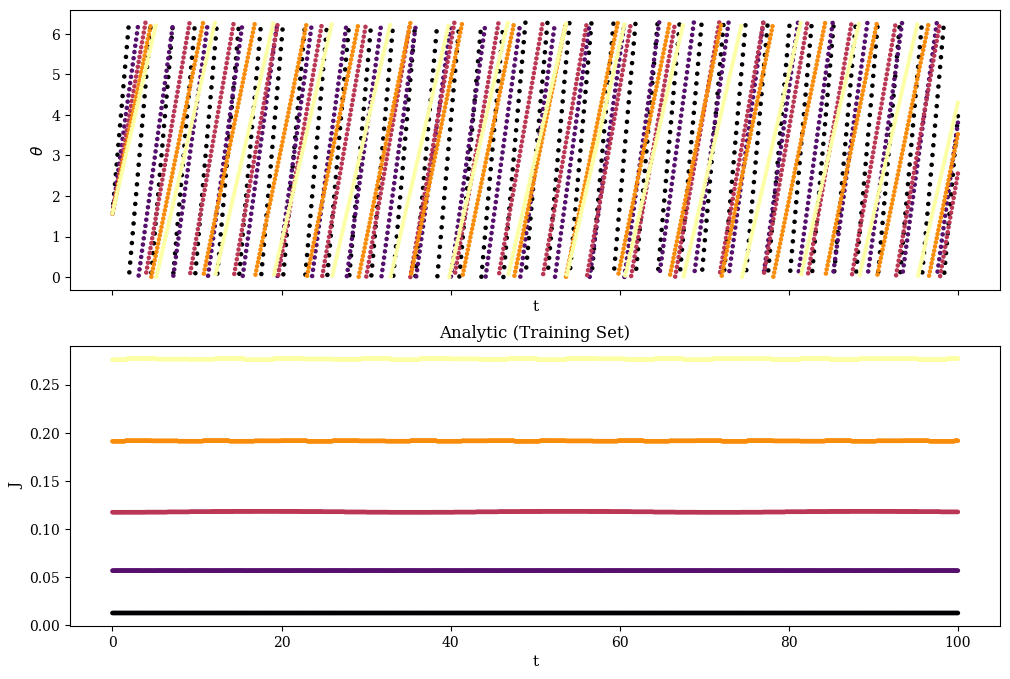

In [3]:
n_orbits = 5
z, aa_correct = generate_orbits(n_orbits, potential, t_end, n_steps, plot=True)

# Generate and Save Training Data

Training data can be found in the training_data folder

In [4]:
import os

print("Current working directory:", os.getcwd())
print("Available files and directories:", os.listdir())

Current working directory: /geir_data/scr/gabrielspace/orbitflows/examples
Available files and directories: ['__pycache__', 'gen_train_load_model.ipynb', 'test_gpt.ipynb', 'gen_load_training_data.ipynb']


Training data saved to /geir_data/scr/gabrielspace/orbitflows/examples/iso_disk_5_orbs/iso_disk_5_orbs.pt
Configuration saved to /geir_data/scr/gabrielspace/orbitflows/examples/iso_disk_5_orbs/iso_disk_5_orbs_config.json


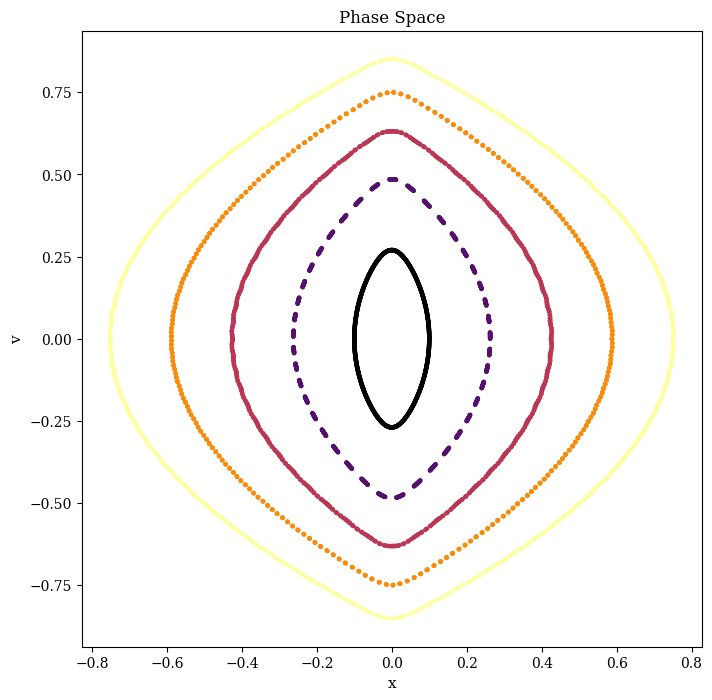

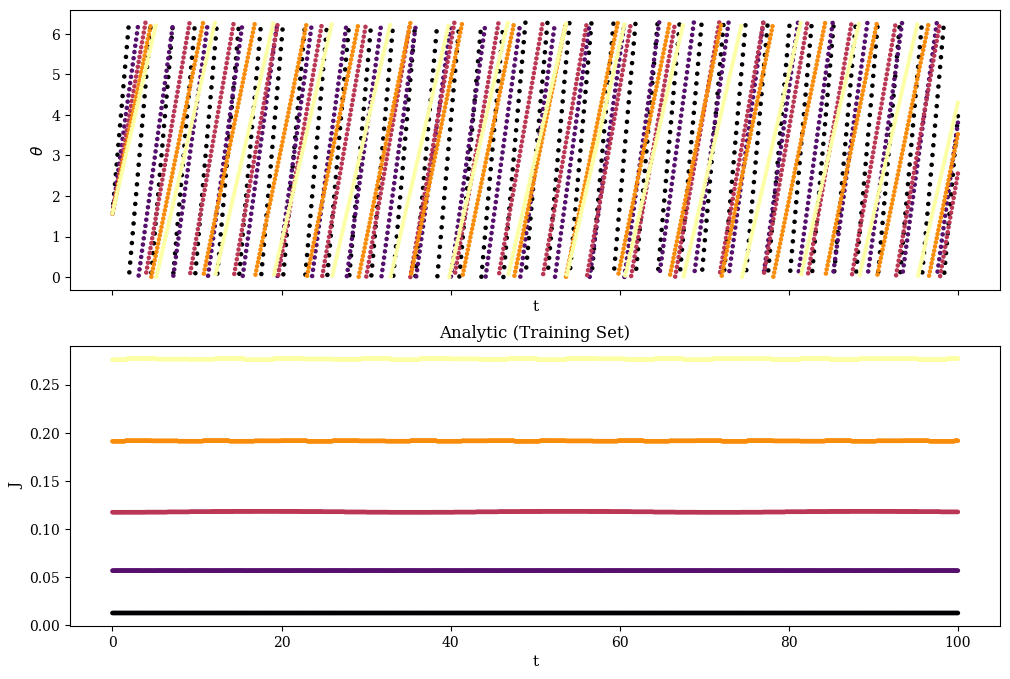

In [5]:
# set saveData to True

n_orbits = 5
filename = 'iso_disk_5_orbs'
output_dir = os.getcwd()
ps, aa = generate_orbits(n_orbits, potential, t_end, n_steps, plot=True, saveData=True, filename=filename, output_dir=output_dir)

# Load Training Data

In [ ]:
from orbitflows.util import DataLoader

/geir_data/scr/gabrielspace/miniforge3/envs/ML_Dyn/lib/python3.12/site-packages/orbitflows/funct/load.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(

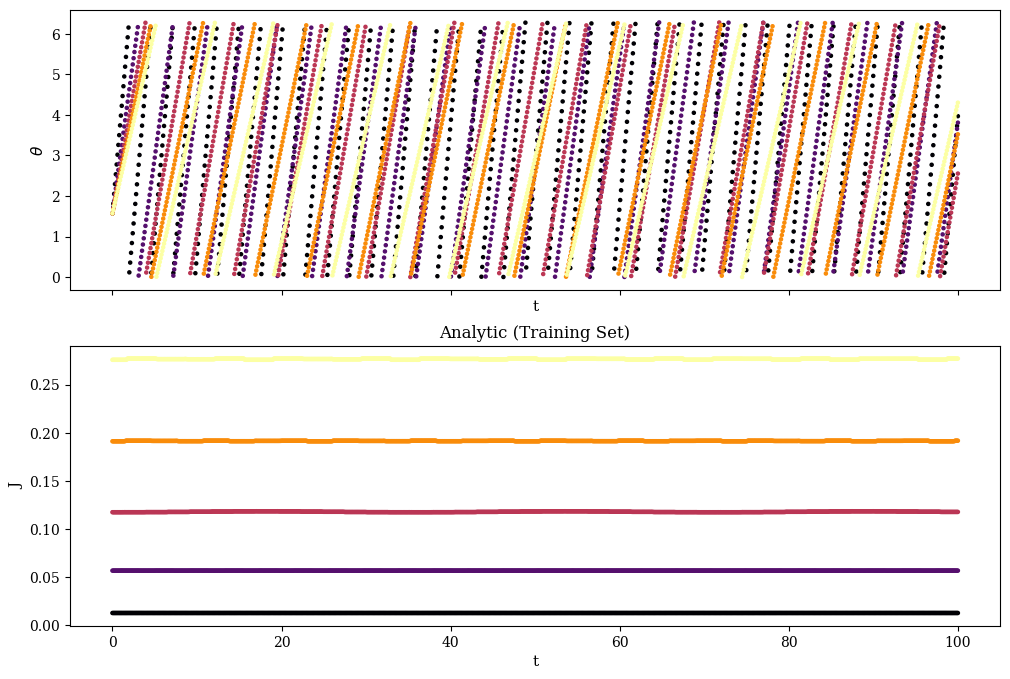

In [34]:
loaded_data = DataLoader(filename, relative_path="")
potential = IsothermalDiskPotential(amp=loaded_data.potential_values['_amp'], sigma=loaded_data.potential_values['_sigma2']**0.5)
plot_aa(loaded_data.n_orbits, loaded_data.aa, t_end = loaded_data.t_ls[-1], n_steps=len(loaded_data.t_ls), color_kwargs={'ps':loaded_data.ps, 'potential_for_H':potential})

There are a variety of attributes of the DataLoader object related to the integration that you can use. 

In [35]:
# for example, you can get the details about the potential that you used to generate the data
print(loaded_data.potential_values)

{'_amp': 1.0, 'dim': 1, 'isRZ': False, 'hasC': True, 'hasC_dxdv': False, 'hasC_dens': False, '_ro': 8.0, '_roSet': False, '_vo': 220.0, '_voSet': False, '_sigma2': 0.010000000000000002, '_H': 0.019947114020071637}
